In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
def scale_data(scale_the_data):
    # to work on copy of the data
    data_scaled = scale_the_data.copy()

    # Scaling the data to keep the different attributes in same range.
    data_scaled[data_scaled.columns] = StandardScaler().fit_transform(data_scaled)

    return data_scaled

def sorted_cluster(x, model=None):
    if model == None:
        model = KMeans()
    model = sorted_cluster_centers_(model, x)
    model = sorted_labels_(model, x)
    return model

def sorted_cluster_centers_(model, x):
    model.fit(x)
    new_centroids = []
    magnitude = []
    for center in model.cluster_centers_:
        magnitude.append(np.sqrt(center.dot(center)))
    idx_argsort = np.argsort(magnitude)
    model.cluster_centers_ = model.cluster_centers_[idx_argsort]
    return model

def sorted_labels_(sorted_model, x):
    sorted_model.labels_ = sorted_model.predict(x)
    return sorted_model

In [3]:
data = pd.read_csv("data_file/air_sensor001_data.csv")
data = data.sort_values(by='Datetime')
data_sort = data.drop(columns = 'Datetime')
data_sort = data_sort.drop(columns = 'Unnamed: 0')
data_sort = data_sort.drop(columns = 'csq')
data_sort = data_sort.drop(columns = 'deviceid')
#data_sort

In [4]:
df_scale = scale_data(data_sort)
#df_scale

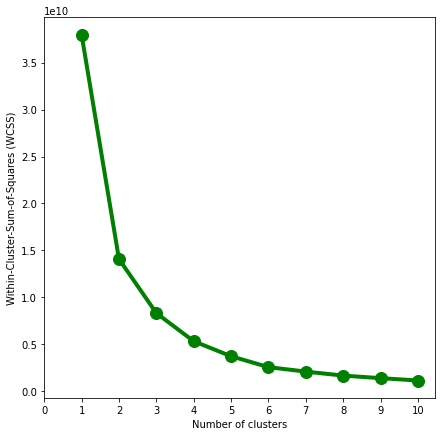

In [5]:
#find the optimal number of clusters using elbow method
x = data_sort[['ethanol','pm25','eco2']].values

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares (WCSS)")
plt.show()

In [6]:
df = df_scale[['ethanol','pm25','eco2']]
kmeans = KMeans(n_clusters=5)
cluster = sorted_cluster(df, kmeans)
data_sort['label'] = cluster.labels_
data_sort['Datetime'] = data['Datetime']
data_sort.to_csv('data_file/3Dtest_k=5_v3.csv')

<AxesSubplot:xlabel='label', ylabel='count'>

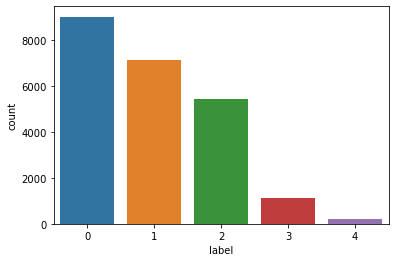

In [7]:
sns.countplot(x=data_sort['label'])

In [8]:
#data_sort

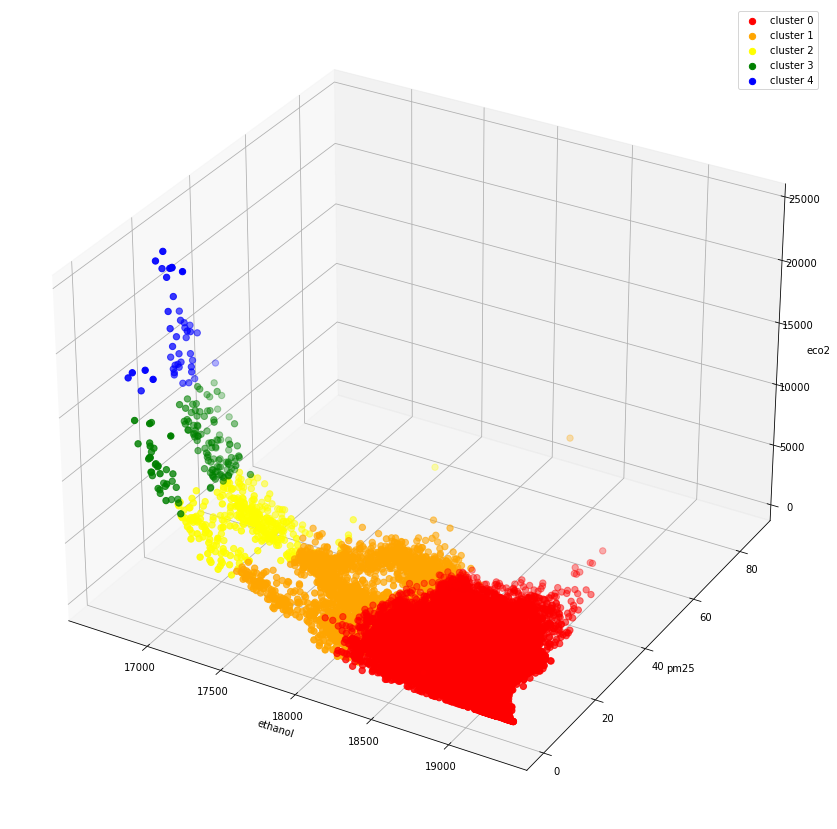

In [9]:
#show 3D K_means

kmeans = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
#y_clusters = kmeans.fit_predict(x)
y_clusters = sorted_cluster(x, kmeans).labels_


fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'red', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'yellow', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = 'green', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'blue', label = "cluster 4")



ax.set_xlabel('ethanol')
ax.set_ylabel('pm25')
ax.set_zlabel('eco2')
ax.legend()
plt.show()